### Ridge

- Transform the Boston House dataset using polynomial transformation and split the dataset into test and train datasets
- Run cross validation with Ridge Regression
- Plot the coefficients of the model

In [1]:
from sklearn.linear_model import Ridge, LinearRegression, Lasso
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [2]:
df = pd.read_csv('boston_house_prices.csv')

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
X = df.drop('MEDV', axis=1)
y = df.MEDV

In [7]:
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [74]:
from sklearn.pipeline import Pipeline
plr = Pipeline(steps=[('poly', PolynomialFeatures(degree=2, include_bias=False)),
                      ('lr', LinearRegression())])

In [75]:
plr.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('lr', LinearRegression())])

In [76]:
plr

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('lr', LinearRegression())])

In [25]:
conefficients = plr[1].coef_
conefficients

array([-2.50882882e+00,  1.19131535e-01, -6.15160535e+00,  1.40760554e+01,
        1.30751268e+02,  1.79590258e+01,  1.14676439e+00, -7.78382290e+00,
        3.55756176e+00,  3.50134824e-02,  3.42008284e+00, -1.68688738e-02,
        2.43024173e-01,  3.74979761e-03,  1.93247862e-01,  1.56379064e-01,
        2.02282322e+00, -3.51410821e-01,  1.13185032e-01, -6.70193388e-03,
       -1.86782908e-01,  4.82475059e-02, -6.00958348e-03,  1.09044373e-01,
       -3.68292426e-04,  2.41531998e-02, -5.09189441e-04, -3.91499127e-03,
       -6.38345959e-02, -1.11110030e+00,  3.13838272e-02,  2.25527232e-04,
       -7.26316797e-03,  2.58117364e-03,  5.53097109e-04, -1.52497549e-02,
        9.03018422e-04, -1.62891909e-03,  4.20916740e-02, -5.10175962e-01,
        2.29993036e+00,  3.07475631e-01,  3.16528126e-03,  1.72101666e-01,
        7.88971436e-03,  3.02847589e-04, -2.00797473e-02,  4.68374710e-03,
       -1.41566653e-02,  1.40760555e+01, -2.64349711e+01, -4.59193269e+00,
        6.60356240e-03,  

In [17]:
X_train.shape

(379, 13)

In [19]:
# total combinations
13 + 13 + 12*13/2

104.0

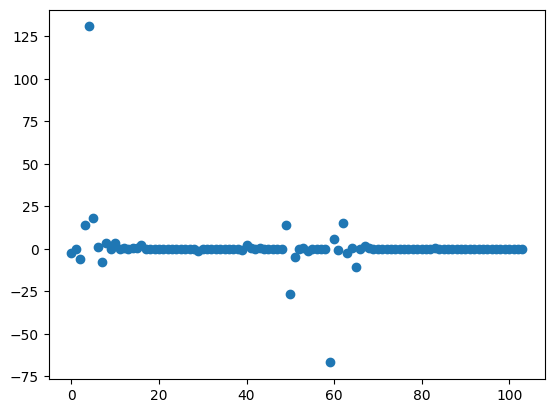

In [29]:

plt.scatter(range(len(conefficients)), conefficients)


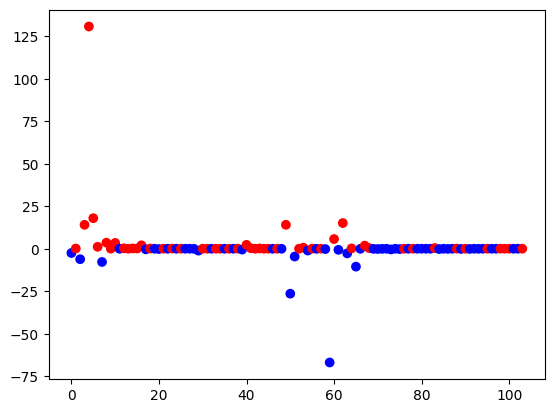

In [30]:
plt.scatter(range(len(conefficients)), conefficients, c = np.sign(conefficients), cmap='bwr')

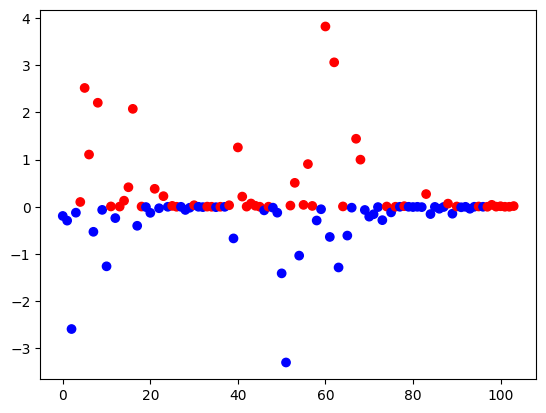

In [79]:
pridge = Pipeline(steps=[('poly', PolynomialFeatures(degree=2, include_bias=False)),
                      ('ridge', Ridge())])

pridge.fit(X_train, y_train)
conefficients = pridge[1].coef_

plt.scatter(range(len(conefficients)), conefficients, c = np.sign(conefficients), cmap='bwr')


In [36]:
sum(conefficients == 0)

0

C:\Users\abhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.137e+03, tolerance: 3.075e+00
  model = cd_fast.enet_coordinate_descent(


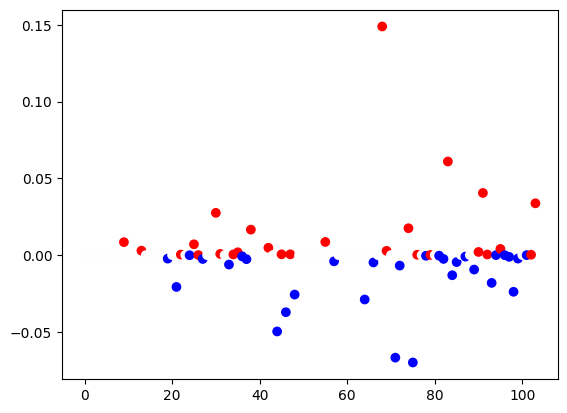

In [37]:
plasso = Pipeline(steps=[('poly', PolynomialFeatures(degree=2, include_bias=False)),
                      ('lasso', Lasso())])

plasso.fit(X_train, y_train)
conefficients = plasso[1].coef_

plt.scatter(range(len(conefficients)), conefficients, c = np.sign(conefficients), cmap='bwr')


In [38]:
sum(conefficients == 0)

48

- Start a grid search for `alpha` value
- Plot the model performance versus the different `alpha` values 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [93]:
pridge = Pipeline(steps=[('poly', PolynomialFeatures(degree=2, include_bias=False)),
                         ('scale', StandardScaler()),
                      ('ridge', Ridge())])
param_grid = {'ridge__alpha': np.logspace(-3, 3, 13)}

In [94]:
x1 = np.log(np.logspace(-3, 3, 13))
# 10^-3, and 10^3
x1[-1]-x1[-2]

1.1512925464970225

In [95]:
x1[-2]-x1[-3]

1.1512925464970225

In [96]:
mygrid = GridSearchCV(pridge, param_grid=param_grid, cv=10, return_train_score=True)

In [97]:
mygrid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('scale', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03])},
             return_train_score=True)

In [98]:
results = pd.DataFrame(mygrid.cv_results_)
results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_ridge__alpha', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'split5_test_score', 'split6_test_score',
       'split7_test_score', 'split8_test_score', 'split9_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'split5_train_score',
       'split6_train_score', 'split7_train_score', 'split8_train_score',
       'split9_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

: 

In [88]:
results.params


0                     {'ridge__alpha': 0.001}
1     {'ridge__alpha': 0.0031622776601683794}
2                      {'ridge__alpha': 0.01}
3       {'ridge__alpha': 0.03162277660168379}
4                       {'ridge__alpha': 0.1}
5       {'ridge__alpha': 0.31622776601683794}
6                       {'ridge__alpha': 1.0}
7        {'ridge__alpha': 3.1622776601683795}
8                      {'ridge__alpha': 10.0}
9        {'ridge__alpha': 31.622776601683793}
10                    {'ridge__alpha': 100.0}
11       {'ridge__alpha': 316.22776601683796}
12                   {'ridge__alpha': 1000.0}
Name: params, dtype: object

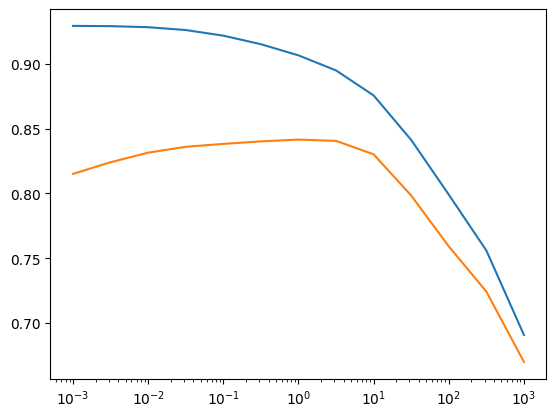

In [89]:
plt.semilogx(results['param_ridge__alpha'], results['mean_train_score'])
plt.semilogx(results['param_ridge__alpha'], results['mean_test_score'])

- Print the best parameter score
- Print the best model score

- Plot the model coefficients

- Plot the model coefficients for alpha=1, 14, and 100

- Create a learning curve for different data train sizes

- Create the learning curve plot for different train size and alpha= 1, 14, and 100